In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('../data/processed/cement_data203.csv')

In [5]:
data

,Unnamed: 0,index,Cidade,Data_Produção,Data_Medida,Tipo de cimento,Classe de resistência,Dados iniciais_Obs,CaO,MgO,...,#200,#325,Massa específica,Tempo de pega_Inicio,Tempo de pega_Fim,RC1,RC3,RC7,RC28,CodCimento
0,0,1.0,AV,2018-02-07 14:00:00,2018-02-07 14:00:00,CP II-E,40,NaN,58.63,1.54,...,0.11,1.17,NaN,170.0,210.0,18.10,30.40,38.23,47.80,122
1,1,2.0,AV,2018-02-14 14:00:00,2018-02-14 14:00:00,CP II-E,40,NaN,58.59,1.50,...,0.05,1.06,NaN,165.0,205.0,20.05,30.78,39.30,52.28,122
2,2,3.0,AV,2018-02-15 16:00:00,2018-02-15 16:00:00,CP II-E,40,NaN,58.90,1.62,...,0.11,1.06,NaN,165.0,190.0,17.63,30.45,40.05,48.15,122
3,3,4.0,AV,2018-02-16 14:00:00,2018-02-16 14:00:00,CP II-E,40,NaN,58.65,1.59,...,0.11,1.38,NaN,175.0,205.0,17.40,30.15,38.35,47.90,122
4,4,5.0,AV,2018-02-19 13:00:00,2018-02-19 13:00:00,CP II-E,40,NaN,58.74,1.63,...,0.11,1.27,NaN,165.0,195.0,17.15,29.25,36.98,48.00,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,18609,710.0,Y,2023-03-11 00:00:00,2023-03-11 00:00:00,NaN,NaN,Fibrocimento,64.05,2.00,...,0.30,3.50,3.08,175.0,225.0,21.90,31.60,36.60,45.10,113
18610,18610,712.0,Y,2023-03-14 00:00:00,2023-03-14 00:00:00,NaN,NaN,Fibrocimento,NaN,NaN,...,0.20,2.80,3.08,160.0,210.0,19.30,30.50,37.00,44.10,113
18611,18611,716.0,Y,2023-03-18 00:00:00,2023-03-18 00:00:00,NaN,NaN,Fibrocimento,65.03,2.25,...,0.30,3.80,3.08,165.0,220.0,20.40,30.50,36.50,43.50,113
18612,18612,718.0,Y,2023-03-21 00:00:00,2023-03-21 00:00:00,NaN,NaN,Fibrocimento,NaN,NaN,...,0.20,2.80,3.08,160.0,225.0,22.60,30.60,39.00,44.00,113


In [81]:
data_AV = data[data['Cidade'] == 'AV'].drop(columns=['Unnamed: 0', 'index', 'Cidade', 'Tipo de cimento', 'Classe de resistência', 'Dados iniciais_Obs'])
data_AV = data_AV.dropna(axis=1, how='all')

In [82]:
pd.to_datetime(data_AV['Data_Produção']).diff()

0                  NaT
1      7 days 00:00:00
2      1 days 02:00:00
3      0 days 22:00:00
4      2 days 23:00:00
             ...      
1505   4 days 03:42:00
1506   2 days 19:47:00
1507   2 days 06:15:00
1508   1 days 18:28:00
1509   3 days 01:35:00
Name: Data_Produção, Length: 1510, dtype: timedelta64[ns]

As datas não são equidistantes, poderia isso ser um problema?

In [83]:
df = data_AV
# Calculate the number of missing values in each column
missing_values_count = df.isnull().sum()

# Calculate the proportion of missing values in each column
missing_values_proportion = missing_values_count / len(df)

# Combine the counts and proportions into a DataFrame
missing_info = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Proportion': missing_values_proportion
})

print("Missing Values Distribution:")
print(missing_info)

Missing Values Distribution:
                      Missing Values Count  Missing Values Proportion
Data_Produção                            0                        0.0
Data_Medida                              0                        0.0
CaO                                      0                        0.0
MgO                                      0                        0.0
Na2O                                     0                        0.0
Al2O3                                    0                        0.0
SiO2                                     0                        0.0
SO3                                      0                        0.0
K2O                                      0                        0.0
Fe2O3                                    0                        0.0
Perda ao fogo                            0                        0.0
Resíduo insolúvel                        0                        0.0
Blaine                                   0                   

In [84]:
groups = data_AV.groupby('CodCimento')
for k, g in groups:
    print(k)
    print(g['Data_Produção'].duplicated().sum())

24
0
50
1
122
16
134
0


In [85]:
df_t = data_AV[data_AV['CodCimento'] == 50]
df_t[df_t['Data_Produção'].duplicated(keep=False)]

,Data_Produção,Data_Medida,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,Fe2O3,...,Blaine,#200,#325,Tempo de pega_Inicio,Tempo de pega_Fim,RC1,RC3,RC7,RC28,CodCimento
1401,2022-03-23 11:50:00,2022-03-23 11:50:00,61.37,1.06,0.16,5.34,19.85,2.85,0.62,2.62,...,4920.0,0.11,0.76,155.0,185.0,25.15,34.90,41.98,51.5,50
1402,2022-03-23 11:50:00,2022-03-23 11:50:00,61.42,1.50,0.17,5.63,20.82,2.82,0.63,2.41,...,4770.0,0.51,2.51,155.0,180.0,25.43,33.65,42.28,51.5,50


In [86]:
data_AV['Data_Produção'] = pd.to_datetime(data_AV['Data_Medida'])

In [90]:
dataset = data_AV.sort_values('Data_Produção').set_index('Data_Produção').drop(columns=['Data_Medida', 'CodCimento'])

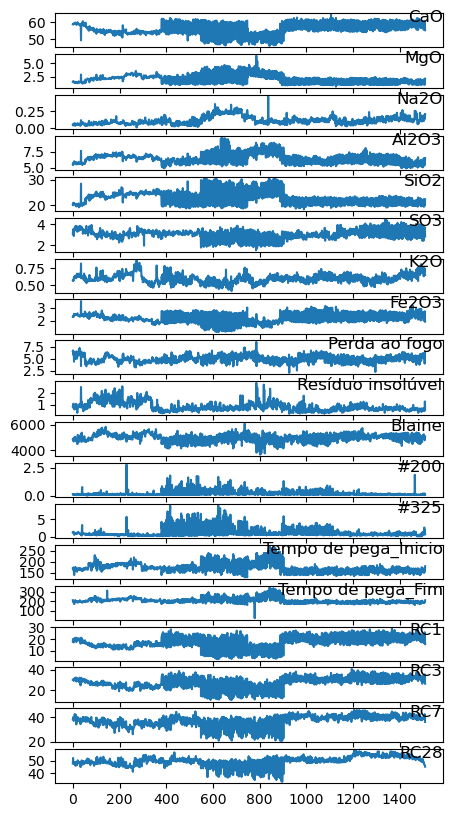

In [95]:
from matplotlib import pyplot as plt
# load dataset
values = dataset.values
# specify columns to plot
groups = range(len(dataset.columns))
i = 1
# plot each column
plt.figure(figsize=(5,10))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(values[:, group])
 plt.title(dataset.columns[group], y=0.5, loc='right')
 i += 1
plt.show()